In [3]:
import os
import copy
import json
import time
import pandas as pd
import collections
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, permutations, product

%matplotlib inline  

In [4]:
t_start = time.time()

In [5]:
with open('input.json') as json_data:
    graph = json.load(json_data)

print(graph)

[{'0': '1'}, {'1': '2'}, {'1': '5'}, {'2': '1'}, {'2': '3'}, {'3': '2'}, {'3': '4'}, {'4': '3'}, {'4': '5'}, {'5': '1'}, {'5': '4'}, {'4': '6'}, {'6': '7'}]


In [6]:
# convert keys to integers
elist = []
for i, val in enumerate(graph):
    keys = list(graph[i].keys())[0]
    e1 = int(graph[i][keys])
    e2 = int(keys)
    #print((e1, e2))
    elist.append((e1, e2, ))

In [7]:
elist

[(1, 0),
 (2, 1),
 (5, 1),
 (1, 2),
 (3, 2),
 (2, 3),
 (4, 3),
 (3, 4),
 (5, 4),
 (1, 5),
 (4, 5),
 (6, 4),
 (7, 6)]

In [8]:
#elist = [(1, 2), (2, 3), (1, 4), (4, 2)]

In [9]:
G = nx.Graph()
G.add_edges_from(elist)

In [10]:
G.edges()

[(1, 0), (1, 2), (1, 5), (2, 3), (5, 4), (3, 4), (4, 6), (6, 7)]

C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

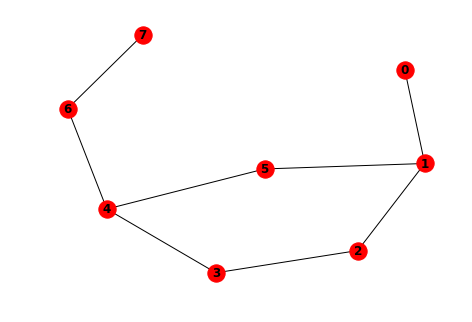

In [11]:
#plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
#plt.subplot(122)
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [12]:
# Inputs
source = 0  # Source node for route finding
targets = G.nodes()  # Target nodes for route finding
targets.remove(0)
print(targets)

[1, 2, 5, 3, 4, 6, 7]


In [13]:
# Create list of all paths to target nodes from source node
paths = {}
for target in targets:
    target_key = str(target)
    paths.update({target_key: []})
    #paths.update({target_key: {paths:[]}})
    for path in nx.all_simple_paths(G, source=source, target=target):
        #print(paths[target_key])
        paths[target_key].append({"source": source, "target": target, "path": path})

paths

{'1': [{'path': [0, 1], 'source': 0, 'target': 1}],
 '2': [{'path': [0, 1, 2], 'source': 0, 'target': 2},
  {'path': [0, 1, 5, 4, 3, 2], 'source': 0, 'target': 2}],
 '3': [{'path': [0, 1, 2, 3], 'source': 0, 'target': 3},
  {'path': [0, 1, 5, 4, 3], 'source': 0, 'target': 3}],
 '4': [{'path': [0, 1, 2, 3, 4], 'source': 0, 'target': 4},
  {'path': [0, 1, 5, 4], 'source': 0, 'target': 4}],
 '5': [{'path': [0, 1, 2, 3, 4, 5], 'source': 0, 'target': 5},
  {'path': [0, 1, 5], 'source': 0, 'target': 5}],
 '6': [{'path': [0, 1, 2, 3, 4, 6], 'source': 0, 'target': 6},
  {'path': [0, 1, 5, 4, 6], 'source': 0, 'target': 6}],
 '7': [{'path': [0, 1, 2, 3, 4, 6, 7], 'source': 0, 'target': 7},
  {'path': [0, 1, 5, 4, 6, 7], 'source': 0, 'target': 7}]}

In [14]:
# Create list of combinations of paths
path_combinations = []
for target in paths:
    path_combinations.append(list(range(0, len(paths[target]))))
    
path_combinations = list(product(*path_combinations))
path_combinations

[(0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 1, 1),
 (0, 0, 1, 0, 1, 0, 0),
 (0, 0, 1, 0, 1, 0, 1),
 (0, 0, 1, 0, 1, 1, 0),
 (0, 0, 1, 0, 1, 1, 1),
 (0, 0, 1, 1, 0, 0, 0),
 (0, 0, 1, 1, 0, 0, 1),
 (0, 0, 1, 1, 0, 1, 0),
 (0, 0, 1, 1, 0, 1, 1),
 (0, 0, 1, 1, 1, 0, 0),
 (0, 0, 1, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 0, 1),
 (0, 1, 0, 0, 0, 1, 0),
 (0, 1, 0, 0, 0, 1, 1),
 (0, 1, 0, 0, 1, 0, 0),
 (0, 1, 0, 0, 1, 0, 1),
 (0, 1, 0, 0, 1, 1, 0),
 (0, 1, 0, 0, 1, 1, 1),
 (0, 1, 0, 1, 0, 0, 0),
 (0, 1, 0, 1, 0,

In [15]:
# Create new graphs for each combination
final_graphs = []

# Loop for each path combination
for path_combination in path_combinations:
    #new_graphs = []
    new_graph = nx.Graph()
    # Loop for each target
    for target_number, target in enumerate(targets):
        #new_graphs.append(nx.Graph())
        edge_list = []
        my_path = paths[str(target)][path_combination[target_number]]['path']
        #print(my_path)
        # Loop for each node in path
        for i in range(0, len(my_path)-1):
            #print(my_path[i])
            #print(my_path[i+1])
            #print('')
            edge_list.append((my_path[i], my_path[i+1]))
        #print(edge_list)
        #print('')
        G1 = nx.Graph()
        G1.add_edges_from(edge_list)
        if target_number > 0:
            new_graph = nx.compose(G1, new_graph)
        
        #print(path_combination[target_number])
        #print(paths[str(target)][path_combination[target_number]]['path'])
    final_graphs.append(new_graph)
    
print(final_graphs)

[<networkx.classes.graph.Graph object at 0x000002446DE32BA8>, <networkx.classes.graph.Graph object at 0x000002446DE32208>, <networkx.classes.graph.Graph object at 0x000002446DE32A20>, <networkx.classes.graph.Graph object at 0x000002446DE329E8>, <networkx.classes.graph.Graph object at 0x000002446DE322E8>, <networkx.classes.graph.Graph object at 0x000002446DE327B8>, <networkx.classes.graph.Graph object at 0x000002446DE32BE0>, <networkx.classes.graph.Graph object at 0x000002446DE32B00>, <networkx.classes.graph.Graph object at 0x000002446DE32C18>, <networkx.classes.graph.Graph object at 0x000002446D7824A8>, <networkx.classes.graph.Graph object at 0x000002446D740048>, <networkx.classes.graph.Graph object at 0x000002446DE54240>, <networkx.classes.graph.Graph object at 0x000002446DE54A90>, <networkx.classes.graph.Graph object at 0x000002446DE54320>, <networkx.classes.graph.Graph object at 0x000002446DE54198>, <networkx.classes.graph.Graph object at 0x000002446DE54278>, <networkx.classes.graph

In [16]:
t_stop = time.time()
print(t_stop - t_start)

0.5159976482391357


C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\jmcneill\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: 

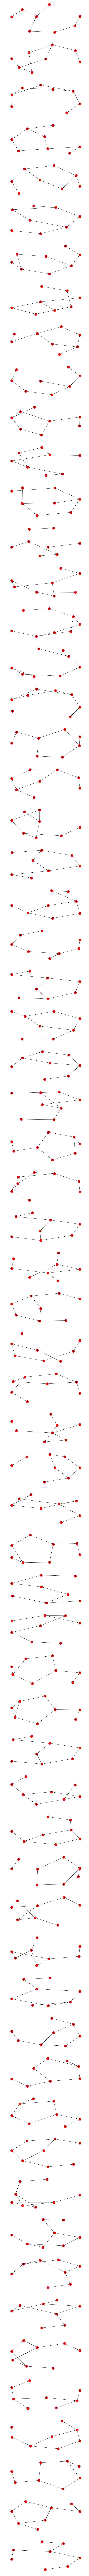

In [17]:
fig = plt.figure(figsize=(10, 5*(len(final_graphs))))
for i, F in enumerate(final_graphs):
    ax = fig.add_subplot(len(final_graphs),1,i+1)
    nx.draw(F, with_labels=True, font_weight='bold')

plt.show()
